# Methodology

1. Initial Exploration - understand distribution, summary statistics identify and remove any outliers likely to be erroneous.
2. Explore User Growth 
3. Explore Savings across users grouped by number of days active and total saved value.

# Initial Exploration

In [1]:
#import relevant libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import dataset

data = pd.read_csv('~/Desktop/cluster_interview_test.csv')

In [2]:
#visualise data in table format

data.head()

,user_id,total_saved_ever,no_of_manual+auto_saves,no_withdrawals,no_auto_saves,no_manual_saves,no_of_cancelled_autosaves,days_active
0,5804b63657135c14008b461f12,0.0,0,0,0,0,0,365
1,5815d07a84ab2011338b457764,0.0,0,0,0,0,8,404
2,586959e3a78c4b520e8b464626,0.0,0,0,0,0,2,22
3,58a6c4e1498b23c9028b45e668,0.0,0,0,0,0,6,190
4,58edfc494d19ee1c0000028627,0.0,0,0,0,0,2,180


In [3]:
data.describe()

#min and max values intuitvely make sense, there is no null data as count are all the same 

,total_saved_ever,no_of_manual+auto_saves,no_withdrawals,no_auto_saves,no_manual_saves,no_of_cancelled_autosaves,days_active
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1317.363305,50.65630,9.675100,44.877200,5.779100,5.488300,464.152400
std,1962.265495,35.89763,9.399477,30.610548,13.925318,9.226157,216.698309
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,249.607500,20.00000,3.000000,18.750000,0.000000,1.000000,351.000000
50%,728.480000,48.00000,7.000000,44.000000,1.000000,2.000000,482.500000
75%,1515.972500,74.00000,14.000000,66.000000,4.000000,6.000000,601.000000
max,21066.090000,233.00000,90.000000,153.000000,155.000000,186.000000,1086.000000


### Initial Insights

- There is no null data as the counts are the same on all the columns. We have a complete dataset.
- The minimum and maximum values for each column intuitively make sense, so we can be fairly confident the dataset contains no incorrect data. 
- 'On average', Chip users have saved £1317 over 51 individual saves. 
- However, 'the average' Chip user (median), has saved only £728 over 48 individual saves, just under half the mean. This indicates that there are likely extreme values with higher savings which are pulling up the mean. 

In [4]:
#confirm no null values

print(data.isna().sum())

user_id                      0
total_saved_ever             0
no_of_manual+auto_saves      0
no_withdrawals               0
no_auto_saves                0
no_manual_saves              0
no_of_cancelled_autosaves    0
days_active                  0
dtype: int64


Text(0.5, 1.0, 'Total Savings')

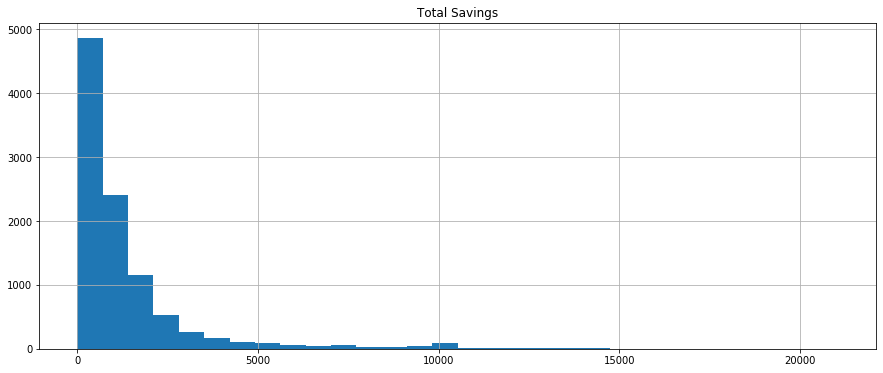

In [28]:
plt.rcParams.update({'font.size': 10})

data.iloc[:,1].hist(figsize =(15,6), bins=30)
plt.title(label ='Total Savings')

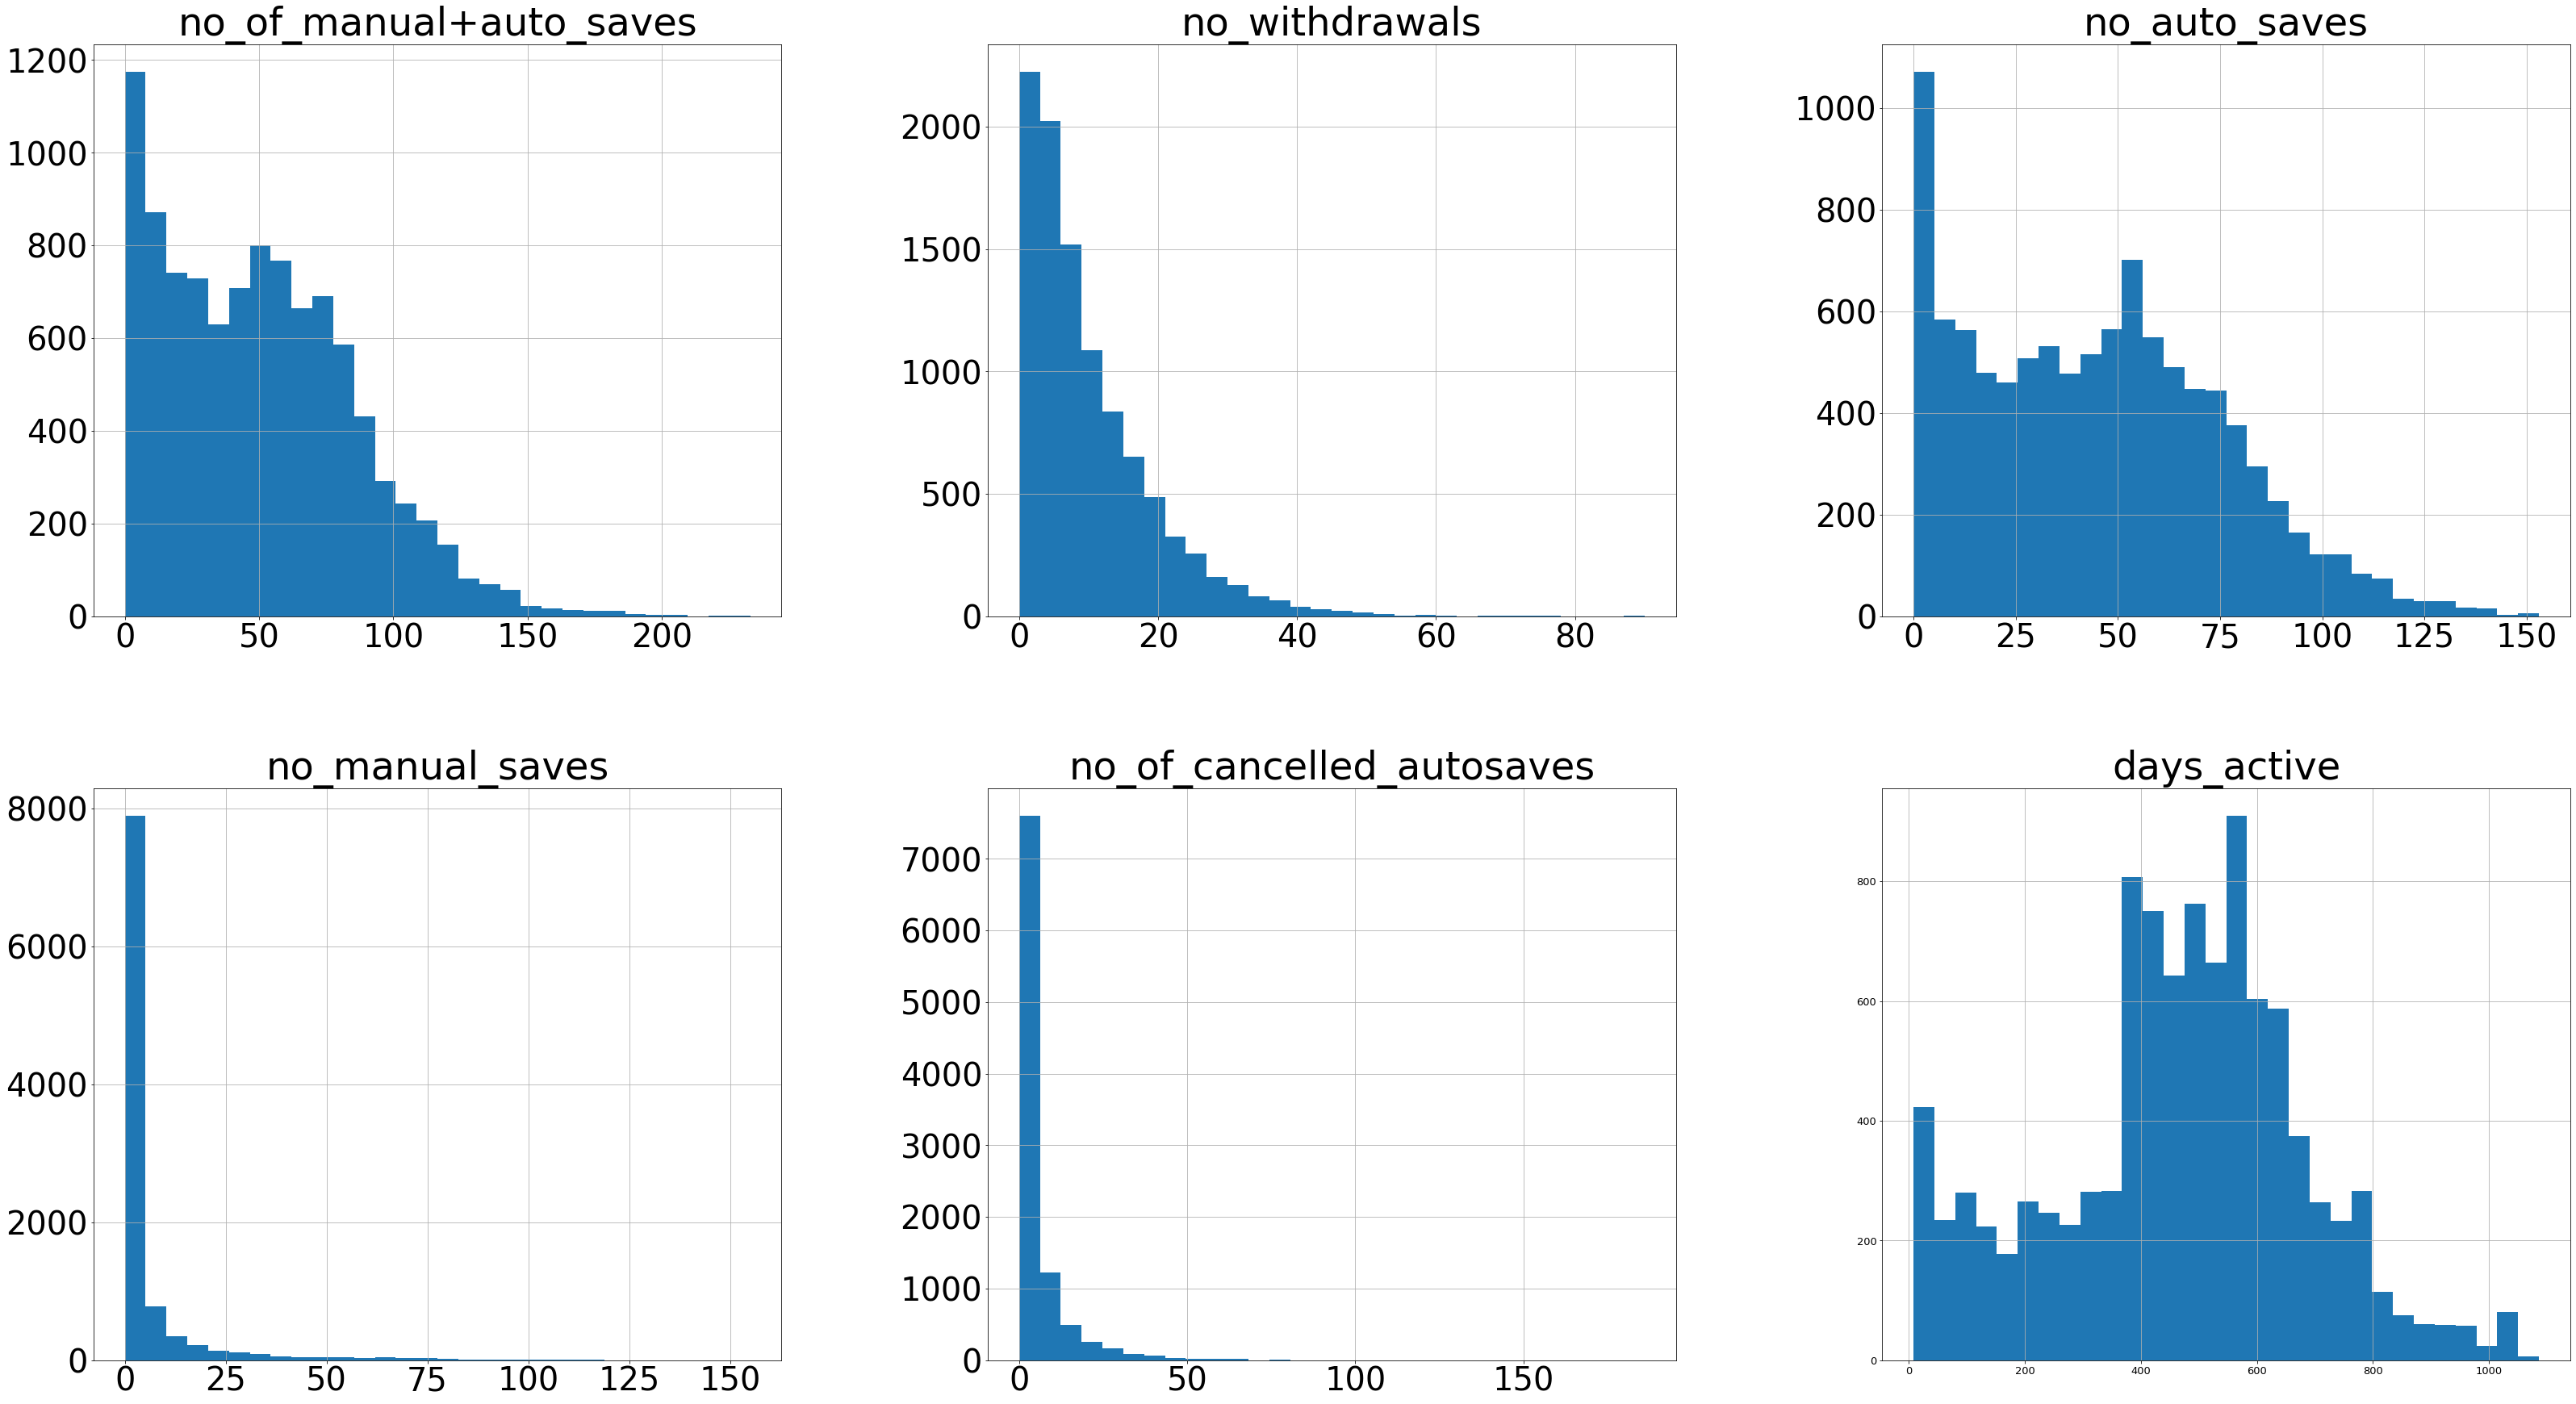

In [31]:
histograms = data.iloc[:,2:] #drop first two colummns. 2nd column visualised above and 1st is User_ID

fig, ax = plt.subplots(2, 3)  #create subplots grid 3x2 


plt.rcParams.update({'font.size': 40})  #change font size to be readable on subplots 

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

m=0
for x in range(2):
    for y in range(3):

        histograms.hist(column = histograms.columns[m], bins = 30, ax=ax[x,y], figsize=(20, 10),)
        m+=1

        

        
fig.set_figheight(30)
fig.set_figwidth(55)


Text(0.5, 1.0, 'Days Active')

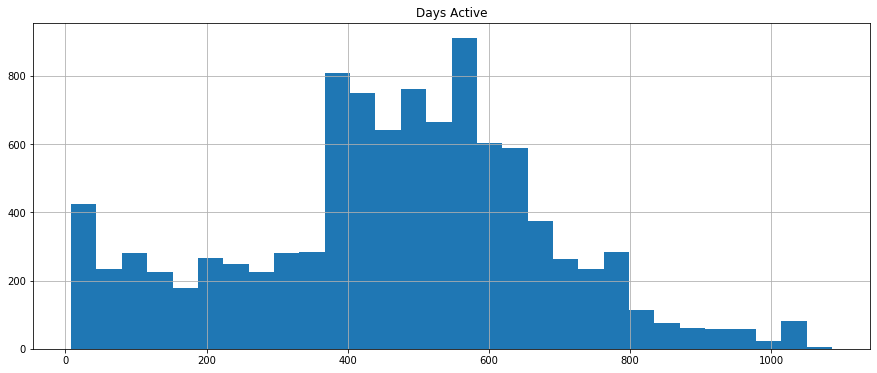

In [7]:
#revisualising days active plot as could not see x and y ticks - unsure why this has happened. 

plt.rcParams.update({'font.size': 10})  #reset fontsize 

data.iloc[:,-1].hist(figsize =(15,6), bins=30)
plt.title(label ='Days Active')

Distribution Insights

- Looking at the days active distribution, we can see that the majority of users are centred around the middle value
- Looking at the no_manual_saves plot, we can see that the vast majority of users have made no manual saves whatsoever. 
- Drawing attention to the no_of_cancelled_saves, almost all users have cancelled under 25 auto-saves.

In [8]:
data.corr()

,total_saved_ever,no_of_manual+auto_saves,no_withdrawals,no_auto_saves,no_manual_saves,no_of_cancelled_autosaves,days_active
total_saved_ever,1.000000,0.707031,0.082545,0.462375,0.806242,-0.035013,0.355849
no_of_manual+auto_saves,0.707031,1.000000,0.350964,0.924484,0.545673,0.057401,0.728752
no_withdrawals,0.082545,0.350964,1.000000,0.368371,0.094988,0.316367,0.430817
no_auto_saves,0.462375,0.924484,0.368371,1.000000,0.185003,0.052585,0.771743
no_manual_saves,0.806242,0.545673,0.094988,0.185003,1.000000,0.032381,0.182185
no_of_cancelled_autosaves,-0.035013,0.057401,0.316367,0.052585,0.032381,1.000000,0.235608
days_active,0.355849,0.728752,0.430817,0.771743,0.182185,0.235608,1.000000


### Comments

- Higher correlation between manual saves and total saved, than between auto saves and total saved. 
- This could be because those with the highest total saved, have supplemented their autosaved funds with manually saved funds.
- Almost no correlation between days_active and manual saves - suggesting propensity to use manual saves does not increase the longer users have held an account.


# User Growth

- In this section I will group users by the length of time they have held a Chip account. Split every 30 days or roughly every month.
- This will allow us to understand how the number of users has grown and if this growth has been consistent

## Cumulative Total Users

In [9]:
months = np.arange(0,1086, 30)  #create array with the bins we will need - grouped every 30 days

months = list(months)  #conert to list 

bins = pd.cut(data['days_active'], months)   #cut using the list created above

columns = list(data.columns)  #create list of columns

monthly = data.groupby(bins)[columns].agg(['count'])  #create new dataframe grouped and count records every 30 days 

monthly = monthly['user_id'].iloc[::-1]  #reverse order so that it is chronological 

monthly.reset_index(drop=True, inplace=True) #reset index to 1-35

Text(0, 0.5, 'Number of Users')

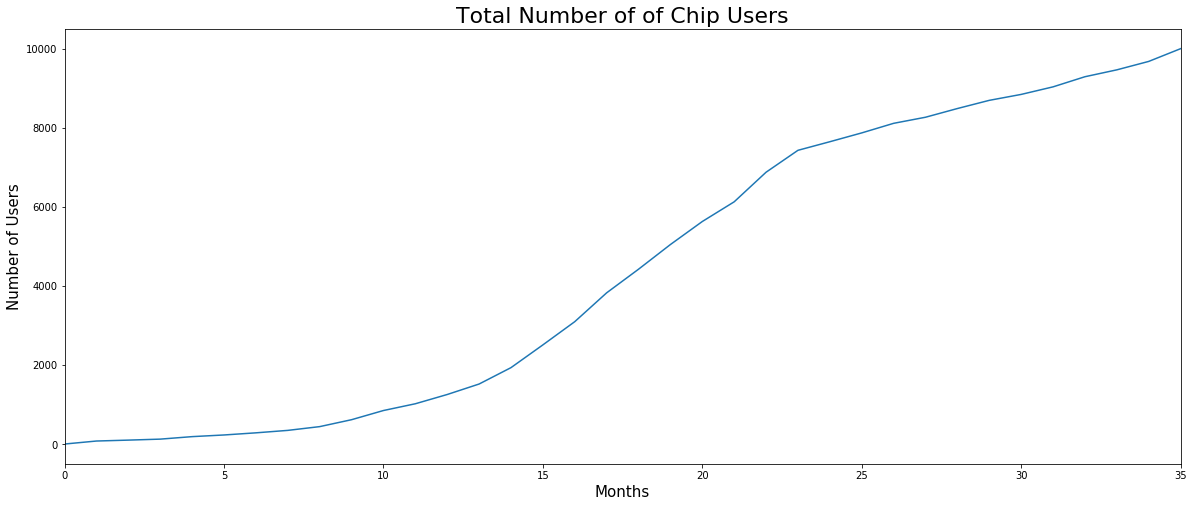

In [10]:
#differing gradients demonstrates growth rate month on month was strongest in the second year. Weakest in first and third

monthly['count'].cumsum().plot(figsize = (20,8))

plt.title(label ='Total Number of of Chip Users', fontsize=22)
plt.xlabel(xlabel ='Months', fontsize=15)
plt.ylabel(ylabel ='Number of Users', fontsize=15)

Insight

- Differing gradients demonstrates growth rate month on month was strongest in the second year. Weakest in first and third. This warrants a closer look.


## Monthly New Users

Text(0, 0.5, 'Number of New Users')

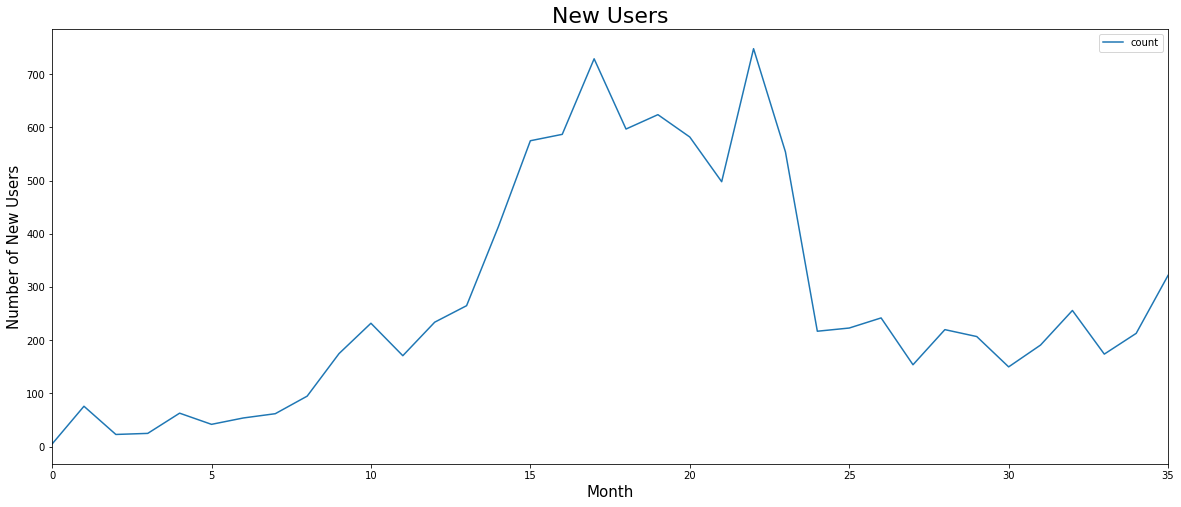

In [11]:
#taking a closer look
#each point on plot reflect the number added each month 

monthly.plot(figsize = (20,8))

plt.title(label ='New Users', fontsize=22)
plt.xlabel(xlabel ='Month', fontsize=15)
plt.ylabel(ylabel ='Number of New Users', fontsize=15)

Insights
- The number of new users added each month has decreased significantly in the past 12 months (23-35) in comparison to the number of new users added in the previous year (Months 10-12).

## Percentage Month on Month Growth

Text(0, 0.5, 'Month on Month Growth')

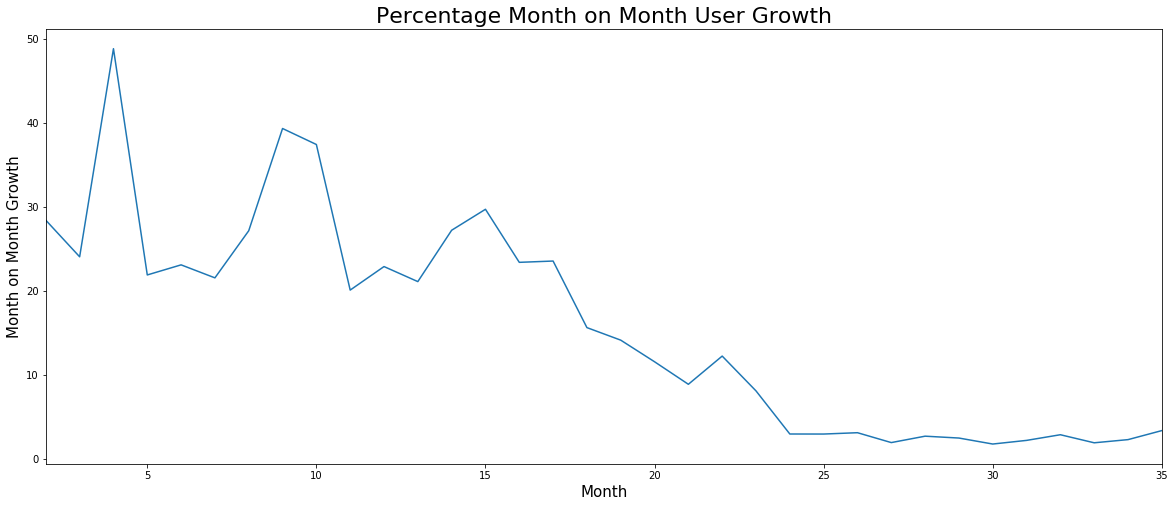

In [12]:
#month on month percentage increase (excluding first month)
#clearly month on month was between 10-50 percent until the past year

(monthly['count'].cumsum().pct_change() * 100)[2:].plot(figsize=(20,8))

plt.title(label ='Percentage Month on Month User Growth', fontsize=22)
plt.xlabel(xlabel ='Month', fontsize=15)
plt.ylabel(ylabel ='Month on Month Growth', fontsize=15)

Comments

- Month on month gross has been significantly lower in the past year.
- Months on Month growth has trended downwards since the start of the dataset.


# Savings

- In this section I will continue using the monthly grouping table but will take into account other columns rather than just a count of users.


In [13]:
#average saved per saving

print('Average Saved per Saving: £', round(data['total_saved_ever'].sum() / data['no_of_manual+auto_saves'].sum(),2))

Average Saved per Saving: £ 26.01


In [14]:
columns = list(data.columns)  #list of columns

datax = data.groupby(bins)[columns].agg(['count', 'sum', 'mean', 'median'])  #reusing same bins

In [15]:
datax = datax.iloc[::-1]  #reverse dataframe order so it is chronological
datax.reset_index(drop=True, inplace=True) #reset index to 1-35

In [16]:
data_copy = datax.copy()   #prevents setoncopywarning
data_copy.drop(columns = 'user_id', level = 0, inplace=True)
data_copy.head()

total_saved_ever                                  no_of_manual+auto_saves  \
             count        sum         mean   median                   count   
0                5   22738.61  4547.722000  4152.69                       5   
1               76  308569.04  4060.118947  3032.48                      76   
2               23   62289.84  2708.253913  2044.64                      23   
3               25   64026.30  2561.052000  1875.38                      25   
4               63  177175.68  2812.312381  1964.87                      63   

                           no_withdrawals        ... no_manual_saves         \
    sum        mean median          count   sum  ...            mean median   
0   601  120.200000  102.0              5    45  ...       14.400000   11.0   
1  9651  126.986842  132.0             76  1364  ...       12.394737    4.0   
2  2143   93.173913   97.0             23   421  ...       11.217391    4.0   
3  2684  107.360000  118.0             25   540  ...        9.240000    2.0   
4  6247   99.158730  101.0             63  1281  ...       11.666667    2.0   

  no_of_cancelled_autosaves                        days_active         \
                      count  sum       mean median       count    sum   
0                         5   68  13.600000      1           5   5292   
1                        76  980  12.894737      4          76  78596   
2                        23  261  11.347826      5          23  23166   
3                        25  181   7.240000      4          25  24305   
4                        63  603   9.571429      4          63  59564   

                        
          mean  median  
0  1058.400000  1057.0  
1  1034.157895  1034.0  
2  1007.217391  1007.0  
3   972.200000   970.0  
4   945.460317   943.0  

[5 rows x 28 columns]

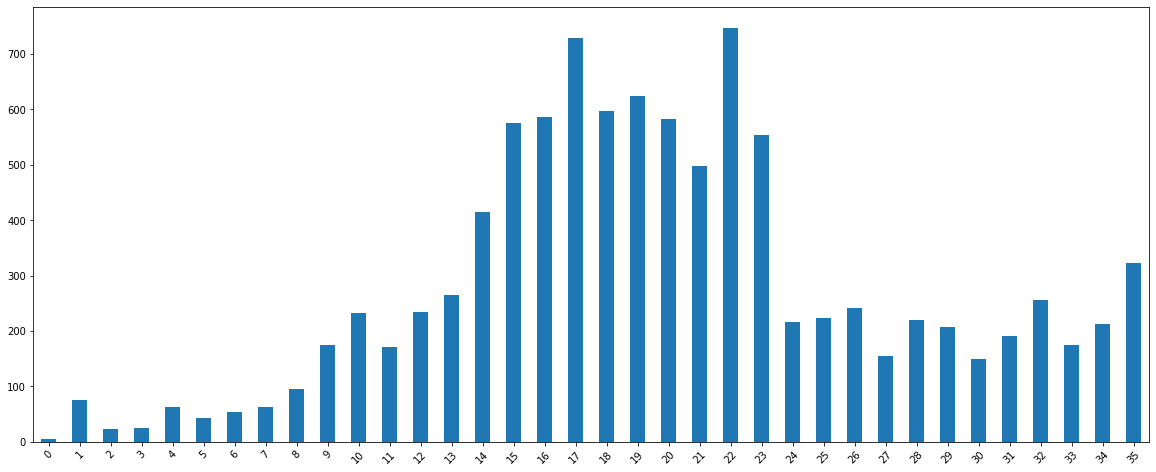

In [17]:
#looking at distribution to see if any months have too small a data sample to draw insight from.
#the first month has too few datapoints so this will be left out

data_copy['total_saved_ever', 'count'].plot(kind='bar', rot=45, figsize=(20,8))

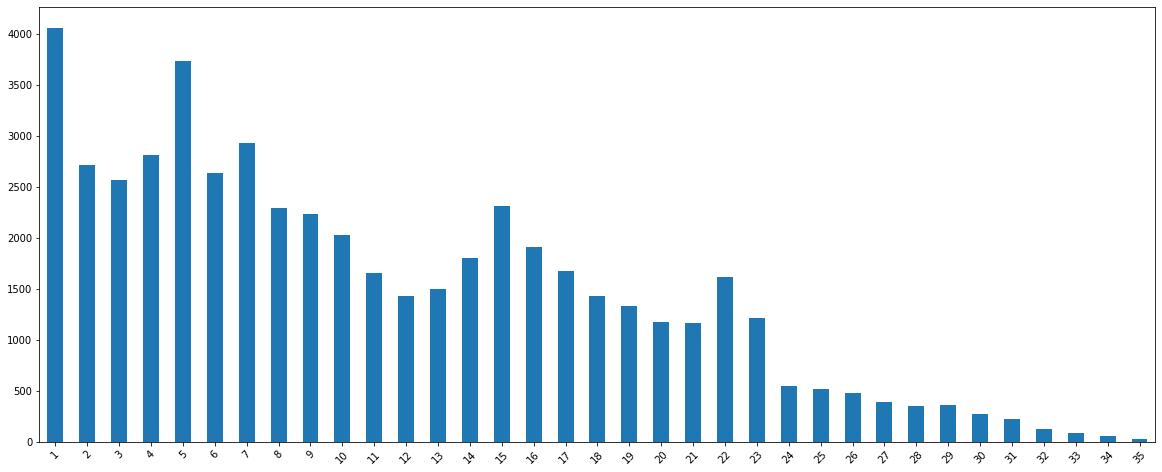

In [18]:
#could be skewed by extreme values
#ignoring the first month because there were too few data to be a useful sample

data_copy['total_saved_ever', 'mean'][1:].plot(kind='bar', rot=45, figsize=(20,8))

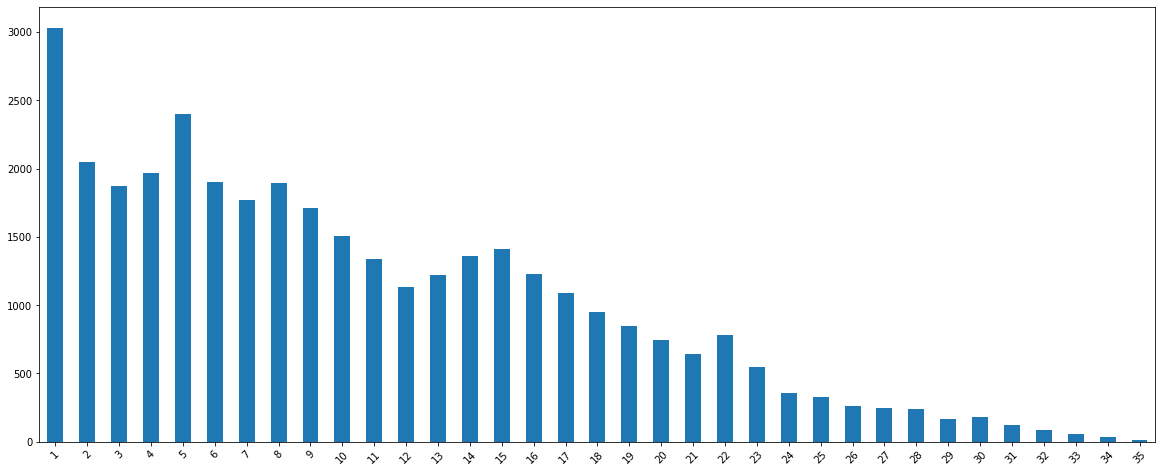

In [19]:
data_copy['total_saved_ever', 'median'][1:].plot(kind='bar', rot=45, figsize=(20,8))

### Insights 

- Comparing the median and the mean for each month grouping, we can see that the mean was most likely skewed upwards by outliers with high values for 'total_saved_ever'. 

- However, the pattern remains the same. The longer groups have had an active Chip account, the lower their mean and median saving is in £ value. 

- This suggests Chip has been more successful in helping more recent users save money than its early adopters. It would be important to determine what has led to this change keep pursuing this strategy. 

## Average Saving per Savings Size Group

- Here I have grouped the Users according to the total amount they have saved. 
- This is in order to look at how the average size of saving changes across these groups.

In [20]:
bins = pd.cut(data['total_saved_ever'], [0, 250, 750, 1500, 3500, 7500, 10000, 22000])

columns = list(data.columns)

dataz = data.groupby(bins)[columns].agg(['count','median', 'sum'])

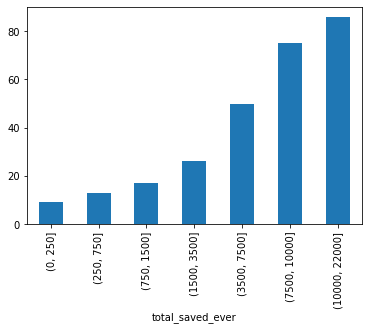

In [21]:
(dataz['total_saved_ever','sum'] / dataz['no_of_manual+auto_saves', 'sum']).plot(kind='bar')

### Insights

- We can see that as we go up the different total savings size grouping, the average of the saving size
increases fairly dramatically. From under £10 in the £0-£250 catgory to £85+ in the £10,000-£22,000 category.